In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 50)
from tqdm import tqdm

In [2]:
file_path_list = []
for dirname, _, filenames in os.walk('./fhir'):
    for filename in filenames:
        file_path_list.append((dirname, filename))

In [3]:
metadata_df = pd.DataFrame(file_path_list, columns=["folder", "file"])

In [4]:
print(f"Files: {metadata_df.shape[0]}")

Files: 129223


In [5]:
metadata_df.head()

,folder,file
0,./fhir,.DS_Store
1,./fhir/61/610,6103fd70-e4ea-41ed-95d6-6217315a1736.json
2,./fhir/61/610,610aaba7-011f-4021-b2ef-419cd0f932d7.json
3,./fhir/61/610,610f16f7-dcd3-43c7-ba8b-f5265999550b.json
4,./fhir/61/610,61011ab5-88e1-4c2f-b1dd-b01d73011121.json


In [6]:
list(metadata_df['folder'])

['./fhir',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/610',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',
 './fhir/61/617',

In [7]:
# Add group and subgroup information

In [8]:
def extract_subgroup(path):
    return path.split("/")[-1]

def extract_group(path):
    return path.split("/")[-2]

In [9]:
metadata_df["group"] = metadata_df["folder"].apply(lambda x: extract_group(x))
metadata_df["subgroup"] = metadata_df["folder"].apply(lambda x: extract_subgroup(x))

In [10]:
metadata_df = metadata_df[["folder", "group", "subgroup", "file"]]

In [11]:

metadata_df = metadata_df.iloc[1:].reset_index(drop=True)

In [14]:
metadata_df.tail()

,folder,group,subgroup,file
129217,./fhir/25/252,25,252,2528505c-abc8-4f68-bde0-c0f64fad5be9.json
129218,./fhir/25/252,25,252,252ba1aa-2e07-40fb-86e8-276be13f5749.json
129219,./fhir/25/252,25,252,25284026-81b4-4a19-a425-828631818e1e.json
129220,./fhir/25/252,25,252,252a88d2-a9b6-4739-b4eb-0426b479567f.json
129221,./fhir/25/252,25,252,25253682-6e9b-4004-a8e1-3c580bd60aa6.json


In [13]:
print(f"Folders: {metadata_df.folder.nunique()}")
print(f"Groups: {metadata_df.group.nunique()}")
print(f"Subgroups: {metadata_df.subgroup.nunique()}")
print(f"Files: {metadata_df.file.nunique()}")

Folders: 4084
Groups: 256
Subgroups: 4084
Files: 129219


In [ ]:
# Read one file

In [15]:
sample_df= pd.read_json('./fhir/d8/d8c/d8cddeba-4cf8-412a-86de-b9af0a6a185b.json')

In [16]:
sample_df

,type,entry,resourceType
0,collection,{'fullUrl': 'urn:uuid:f7b73132-64f0-462b-8ca5-...,Bundle
1,collection,{'fullUrl': 'urn:uuid:ab801624-bfef-410f-8e75-...,Bundle
2,collection,{'fullUrl': 'urn:uuid:224407fa-cf73-41d2-aee3-...,Bundle
3,collection,{'fullUrl': 'urn:uuid:d66f0cc2-20f0-49b0-9883-...,Bundle
4,collection,{'fullUrl': 'urn:uuid:63f1c8f9-279c-4fae-8aef-...,Bundle
...,...,...,...
57,collection,{'fullUrl': 'urn:uuid:880a983b-e9d8-4e15-8b30-...,Bundle
58,collection,{'fullUrl': 'urn:uuid:280f6752-f373-4e84-937a-...,Bundle
59,collection,{'fullUrl': 'urn:uuid:457e6568-8b00-4a28-abb1-...,Bundle
60,collection,{'fullUrl': 'urn:uuid:22080e43-8bcd-422c-a737-...,Bundle


In [18]:
sample_df['entry'][1]

{'fullUrl': 'urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4',
 'resource': {'id': 'ab801624-bfef-410f-8e75-e66f7b363bc4',
  'status': 'finished',
  'class': {'code': 'outpatient'},
  'type': [{'coding': [{'system': 'http://snomed.info/sct',
      'code': '185349003'}],
    'text': 'Outpatient Encounter'}],
  'patient': {'reference': 'urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297'},
  'period': {'start': '2011-10-29T15:35:57-04:00',
   'end': '2011-10-29T16:35:57-04:00'},
  'resourceType': 'Encounter'}}

In [19]:
# Data Exploration

In [ ]:
# import and process one file

In [20]:
patient_df = pd.DataFrame() 
careplan_df = pd.DataFrame() 
condition_df = pd.DataFrame() 
diagnostic_report_df = pd.DataFrame() 
encounter_df = pd.DataFrame() 
immunization_df = pd.DataFrame() 
observation_df = pd.DataFrame() 
procedure_df = pd.DataFrame() 

In [21]:
def process_one_file(sample_df,
                    patient_df,
                    careplan_df,
                    condition_df,
                    diagnostic_report_df,
                    encounter_df,
                    immunization_df,
                    observation_df,
                    procedure_df):
    
    dataframe_list = [patient_df, careplan_df, condition_df, diagnostic_report_df,
                 encounter_df, immunization_df, observation_df, procedure_df]
    
    for index, row in sample_df.iterrows():
        resourcetype=set()
        tempdf=pd.json_normalize(row.entry)
        resourcetype.add([str(x) for x in tempdf['resource.resourceType']][0])

        if str(tempdf['resource.resourceType'][0])=="Patient":
            frames = [patient_df, tempdf]
            patient_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="CarePlan":
            frames = [careplan_df, tempdf]
            careplan_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="Condition":
            frames = [condition_df, tempdf]
            condition_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="DiagnosticReport":
            frames = [diagnostic_report_df, tempdf]
            diagnostic_report_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="Encounter":
            frames = [encounter_df, tempdf]
            encounter_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="Immunization":
            frames = [immunization_df, tempdf]
            immunization_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="Observation":
            frames = [observation_df, tempdf]
            observation_df = pd.concat(frames)

        elif str(tempdf['resource.resourceType'][0])=="Procedure":
            frames = [procedure_df, tempdf]
            procedure_df = pd.concat(frames)   

    return patient_df,\
                    careplan_df,\
                    condition_df,\
                    diagnostic_report_df,\
                    encounter_df,\
                    immunization_df,\
                    observation_df,\
                    procedure_df

In [22]:
def clean_and_rename(patient_df,
                    careplan_df,
                    condition_df,
                    diagnostic_report_df,
                    encounter_df,
                    immunization_df,
                    observation_df,
                    procedure_df):
    for df in [patient_df, careplan_df, condition_df, diagnostic_report_df,
                 encounter_df, immunization_df, observation_df, procedure_df]:
        df.columns = df.columns.str.replace(".", "_")
        df.columns = df.columns.str.replace("resource_", "")
    
    for df in [patient_df, observation_df, encounter_df]:
        df['fullUrl']= df['fullUrl'].str.replace('urn:uuid:', '')
    
    for df in [encounter_df, immunization_df]:
        df['patient_reference'] = df['patient_reference'].str.replace('urn:uuid:', '')
        
    for df in [immunization_df]:
        df['encounter_reference'] = df['encounter_reference'].str.replace('urn:uuid:', '')
        
    for df in [observation_df, procedure_df]:
        df['subject_reference'] = df['subject_reference'].str.replace('urn:uuid:', '')
        df['encounter_reference'] = df['encounter_reference'].str.replace('urn:uuid:', '')
        
    return patient_df,\
                    careplan_df,\
                    condition_df,\
                    diagnostic_report_df,\
                    encounter_df,\
                    immunization_df,\
                    observation_df,\
                    procedure_df

In [23]:
patient_df,\
careplan_df,\
condition_df,\
diagnostic_report_df,\
encounter_df,\
immunization_df,\
observation_df,\
procedure_df = \
process_one_file(sample_df,patient_df,
careplan_df,
condition_df,
diagnostic_report_df,
encounter_df,
immunization_df,
observation_df,
procedure_df)

In [24]:
patient_df.head()

,fullUrl,resource.id,resource.text.status,resource.text.div,resource.extension,resource.identifier,resource.name,resource.telecom,resource.gender,resource.birthDate,resource.address,resource.maritalStatus.coding,resource.multipleBirthBoolean,resource.photo,resource.resourceType
0,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,f7b73132-64f0-462b-8ca5-94dc5205b297,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Botsford730', ...",[{'extension': [{'url': 'http://standardhealth...,male,1987-10-12,[{'extension': [{'extension': [{'url': 'latitu...,[{'system': 'http://hl7.org/fhir/v3/MaritalSta...,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient


In [25]:
careplan_df.head()

,resource.status,resource.category,resource.subject.reference,resource.context.reference,resource.period.start,resource.addresses,resource.activity,resource.resourceType
0,active,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2008-07-28,[{'reference': 'urn:uuid:63f1c8f9-279c-4fae-8a...,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan


In [26]:
condition_df.head()

,fullUrl,resource.id,resource.clinicalStatus,resource.verificationStatus,resource.code.coding,resource.subject.reference,resource.context.reference,resource.onsetDateTime,resource.abatementDateTime,resource.resourceType
0,urn:uuid:224407fa-cf73-41d2-aee3-167b974b6633,224407fa-cf73-41d2-aee3-167b974b6633,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2000-08-21T22:51:57-04:00,2000-09-07T20:05:34-04:00,Condition
0,urn:uuid:d66f0cc2-20f0-49b0-9883-0b604832184f,d66f0cc2-20f0-49b0-9883-0b604832184f,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2006-09-20T16:28:19-04:00,NaN,Condition
0,urn:uuid:63f1c8f9-279c-4fae-8aef-8604307dc65c,63f1c8f9-279c-4fae-8aef-8604307dc65c,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2008-07-28T17:00:46-04:00,NaN,Condition


In [27]:
diagnostic_report_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.issued,resource.performer,resource.result,resource.resourceType
0,urn:uuid:844d8e72-084e-481a-b8f6-c98be10cc3b1,844d8e72-084e-481a-b8f6-c98be10cc3b1,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,2011-10-29T15:35:57-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:8c1c89df-e12b-4f92-b7...,DiagnosticReport
0,urn:uuid:57b3256b-6e9e-44f7-bc5d-4866a3527ad3,57b3256b-6e9e-44f7-bc5d-4866a3527ad3,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:3c518c40-bf0c-4753-a13f-dff041711fa3,2014-03-06T05:41:14-05:00,2014-03-06T05:41:14-05:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:c439ff53-9613-420e-81...,DiagnosticReport
0,urn:uuid:457e6568-8b00-4a28-abb1-c9da5994f328,457e6568-8b00-4a28-abb1-c9da5994f328,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:cb103937-851c-4211-96b2-fcd10de66738,2017-02-12T13:59:38-05:00,2017-02-12T13:59:38-05:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:24e24f09-27a3-4751-8e...,DiagnosticReport


In [28]:
encounter_df.head()

,fullUrl,resource.id,resource.status,resource.class.code,resource.type,resource.patient.reference,resource.period.start,resource.period.end,resource.resourceType
0,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,ab801624-bfef-410f-8e75-e66f7b363bc4,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,2011-10-29T15:35:57-04:00,2011-10-29T16:35:57-04:00,Encounter
0,urn:uuid:3c518c40-bf0c-4753-a13f-dff041711fa3,3c518c40-bf0c-4753-a13f-dff041711fa3,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,2014-03-06T05:41:14-05:00,2014-03-06T06:41:14-05:00,Encounter
0,urn:uuid:cb103937-851c-4211-96b2-fcd10de66738,cb103937-851c-4211-96b2-fcd10de66738,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,2017-02-12T13:59:38-05:00,2017-02-12T14:59:38-05:00,Encounter


In [29]:
immunization_df.head()

,resource.status,resource.date,resource.vaccineCode.coding,resource.patient.reference,resource.wasNotGiven,resource.primarySource,resource.encounter.reference,resource.resourceType
0,completed,2011-10-29T15:35:57-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,False,True,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,Immunization
0,completed,2011-10-29T15:35:57-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,False,True,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,Immunization
0,completed,2014-03-06T05:41:14-05:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,False,True,urn:uuid:3c518c40-bf0c-4753-a13f-dff041711fa3,Immunization
0,completed,2017-02-12T13:59:38-05:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,False,True,urn:uuid:cb103937-851c-4211-96b2-fcd10de66738,Immunization


In [30]:
observation_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.resourceType,resource.component
0,urn:uuid:25237765-4735-4ab8-89dd-1369732c4909,25237765-4735-4ab8-89dd-1369732c4909,final,"[{'system': 'http://loinc.org', 'code': '4548-...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,5.900000,%,http://unitsofmeasure.org/,%,Observation,NaN
0,urn:uuid:78022e05-fc27-4671-b3f5-22dd2e6064ca,78022e05-fc27-4671-b3f5-22dd2e6064ca,final,"[{'system': 'http://loinc.org', 'code': '8302-...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,163.440620,cm,http://unitsofmeasure.org/,cm,Observation,NaN
0,urn:uuid:2a394421-6de6-4268-96e4-fe912628a03f,2a394421-6de6-4268-96e4-fe912628a03f,final,"[{'system': 'http://loinc.org', 'code': '29463...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,80.173659,kg,http://unitsofmeasure.org/,kg,Observation,NaN
0,urn:uuid:335a592c-dedf-4edc-b96e-2718a1c812ac,335a592c-dedf-4edc-b96e-2718a1c812ac,final,"[{'system': 'http://loinc.org', 'code': '39156...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,30.013159,kg/m2,http://unitsofmeasure.org/,kg/m2,Observation,NaN
0,urn:uuid:c5427cd4-0bc3-4bf5-97ae-870a0c5d25dd,c5427cd4-0bc3-4bf5-97ae-870a0c5d25dd,final,"[{'system': 'http://loinc.org', 'code': '55284...",urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,NaN,NaN,NaN,NaN,Observation,[{'code': {'coding': [{'system': 'http://loinc...


In [31]:
procedure_df

,resource.status,resource.code.coding,resource.code.text,resource.subject.reference,resource.encounter.reference,resource.performedDateTime,resource.resourceType
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Documentation of current medications,urn:uuid:f7b73132-64f0-462b-8ca5-94dc5205b297,urn:uuid:ab801624-bfef-410f-8e75-e66f7b363bc4,2011-10-29T15:35:57-04:00,Procedure


In [ ]:
# Import and process a group of files

In [37]:
#import an entire group of files. We will pick few groups with the largest size.

In [32]:
sel_index = list(metadata_df.group.value_counts()[0:2].index)
sel_index

['d6', 'e1']

In [35]:
group_df = metadata_df.loc[metadata_df.group.isin(sel_index)]

In [36]:
group_df.shape[0], group_df.shape[0] / metadata_df.shape[0]

(1119, 0.00865951618145517)

In [38]:
#select only first 1.1K entries, or less than 1% of the data.

In [39]:
patient_df = pd.DataFrame() 
careplan_df = pd.DataFrame() 
condition_df = pd.DataFrame() 
diagnostic_report_df = pd.DataFrame() 
encounter_df = pd.DataFrame() 
immunization_df = pd.DataFrame() 
observation_df = pd.DataFrame() 
procedure_df = pd.DataFrame() 

In [40]:
for index, row in tqdm(group_df.iterrows()):
    folder = row["folder"]
    file = row["file"]
    sample_df = pd.read_json(os.path.join(folder, file))
    patient_df,\
    careplan_df,\
    condition_df,\
    diagnostic_report_df,\
    encounter_df,\
    immunization_df,\
    observation_df,\
    procedure_df = \
    process_one_file(sample_df,patient_df,
    careplan_df,
    condition_df,
    diagnostic_report_df,
    encounter_df,
    immunization_df,
    observation_df,
    procedure_df)

1119it [02:24,  7.76it/s]


In [ ]:
#Let's check the data size for each dimmension.

In [41]:
patient_df.shape[0], careplan_df.shape[0], condition_df.shape[0], diagnostic_report_df.shape[0], encounter_df.shape[0], immunization_df.shape[0],\
observation_df.shape[0], procedure_df.shape[0]

(1119, 2115, 4125, 2681, 10298, 7421, 41520, 4757)

In [42]:
for df in [patient_df, careplan_df, condition_df, diagnostic_report_df, encounter_df, immunization_df, observation_df,procedure_df]:
    print(df.columns)

Index(['fullUrl', 'resource.id', 'resource.text.status', 'resource.text.div',
       'resource.extension', 'resource.identifier', 'resource.name',
       'resource.telecom', 'resource.gender', 'resource.birthDate',
       'resource.deceasedDateTime', 'resource.address',
       'resource.maritalStatus.coding', 'resource.multipleBirthBoolean',
       'resource.photo', 'resource.resourceType',
       'resource.multipleBirthInteger'],
      dtype='object')
Index(['resource.status', 'resource.category', 'resource.subject.reference',
       'resource.context.reference', 'resource.period.start',
       'resource.addresses', 'resource.activity', 'resource.resourceType',
       'resource.period.end'],
      dtype='object')
Index(['fullUrl', 'resource.id', 'resource.clinicalStatus',
       'resource.verificationStatus', 'resource.code.coding',
       'resource.subject.reference', 'resource.context.reference',
       'resource.onsetDateTime', 'resource.resourceType',
       'resource.abatementDat

In [43]:
patient_df.head()

,fullUrl,resource.id,resource.text.status,resource.text.div,resource.extension,resource.identifier,resource.name,resource.telecom,resource.gender,resource.birthDate,resource.deceasedDateTime,resource.address,resource.maritalStatus.coding,resource.multipleBirthBoolean,resource.photo,resource.resourceType,resource.multipleBirthInteger
0,urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Moen903', 'giv...",[{'extension': [{'url': 'http://standardhealth...,male,1948-09-12,1989-04-02T17:36:25-04:00,[{'extension': [{'extension': [{'url': 'latitu...,[{'system': 'http://hl7.org/fhir/v3/MaritalSta...,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient,NaN
0,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,1117ae06-e920-4768-a351-f0db77a1edaa,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Will292', 'giv...",[{'extension': [{'url': 'http://standardhealth...,female,1936-04-27,NaN,[{'extension': [{'extension': [{'url': 'latitu...,[{'system': 'http://hl7.org/fhir/v3/MaritalSta...,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient,NaN
0,urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,88c50d56-619e-42b5-a7ba-4c864c2f4f5f,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Lemke253', 'gi...",[{'extension': [{'url': 'http://standardhealth...,male,1959-10-29,2015-01-28T22:19:03-05:00,[{'extension': [{'extension': [{'url': 'latitu...,[{'system': 'http://hl7.org/fhir/v3/MaritalSta...,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient,NaN
0,urn:uuid:a3f267fd-dd43-42da-877a-9d04d6a9bb79,a3f267fd-dd43-42da-877a-9d04d6a9bb79,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Hamill421', 'g...",[{'extension': [{'url': 'http://standardhealth...,male,2015-06-12,NaN,[{'extension': [{'extension': [{'url': 'latitu...,NaN,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient,NaN
0,urn:uuid:aeb820cc-8a4d-4e4c-89b2-bdd1d7a40e98,aeb820cc-8a4d-4e4c-89b2-bdd1d7a40e98,generated,"<div>Generated by <a href=""https://github.com/...",[{'url': 'http://hl7.org/fhir/StructureDefinit...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Frami969', 'gi...",[{'extension': [{'url': 'http://standardhealth...,male,1985-11-26,NaN,[{'extension': [{'extension': [{'url': 'latitu...,[{'system': 'http://hl7.org/fhir/v3/MaritalSta...,False,"[{'contentType': 'image/png', 'data': 'iVBORw0...",Patient,NaN


In [44]:
careplan_df.head()

,resource.status,resource.category,resource.subject.reference,resource.context.reference,resource.period.start,resource.addresses,resource.activity,resource.resourceType,resource.period.end
0,active,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,1962-06-19,[{'reference': 'urn:uuid:52aa0d7a-b4f5-4240-be...,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan,NaN
0,active,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:01af85a3-97f9-4251-9dd5-59d9c48dd9c3,1964-09-30,NaN,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan,NaN
0,active,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:2a38d639-5905-48c9-9cbe-43e18513452c,2013-06-17,[{'reference': 'urn:uuid:7da0b21b-afe5-4a74-96...,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan,NaN
0,completed,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:aeb820cc-8a4d-4e4c-89b2-bdd1d7a40e98,urn:uuid:6ad442c4-2e5a-4a17-8a40-dde4dbc78651,2012-04-03,NaN,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan,2012-05-18
0,active,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:d8340438-704c-40e2-bee5-c5021d0b8466,urn:uuid:1540c31a-63d4-4e3f-bfb1-34d64affb69c,1988-02-28,NaN,[{'detail': {'code': {'coding': [{'system': 'h...,CarePlan,NaN


In [45]:
condition_df.head()

,fullUrl,resource.id,resource.clinicalStatus,resource.verificationStatus,resource.code.coding,resource.subject.reference,resource.context.reference,resource.onsetDateTime,resource.resourceType,resource.abatementDateTime
0,urn:uuid:7030f888-3c30-4039-a5ef-8d86a9c081e8,7030f888-3c30-4039-a5ef-8d86a9c081e8,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,urn:uuid:a12b8ff2-ee2a-457e-ba45-06a2210cba21,1989-04-02T17:36:25-04:00,Condition,NaN
0,urn:uuid:2c43aa39-87ac-4c0e-bbc9-1f4058f80fe8,2c43aa39-87ac-4c0e-bbc9-1f4058f80fe8,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,1954-11-15T11:27:11-05:00,Condition,NaN
0,urn:uuid:52aa0d7a-b4f5-4240-bee4-f65b19ae9ab1,52aa0d7a-b4f5-4240-bee4-f65b19ae9ab1,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,1962-06-19T19:47:04-04:00,Condition,NaN
0,urn:uuid:a5b24a5b-833d-40eb-8d99-4199247b83e5,a5b24a5b-833d-40eb-8d99-4199247b83e5,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:7a5ba8a4-ed04-4cc3-bbf1-ba40687ac5d4,2011-09-28T06:46:20-04:00,Condition,2011-10-12T17:09:25-04:00
0,urn:uuid:7efaafa4-b652-44bd-963a-1cc834ff0051,7efaafa4-b652-44bd-963a-1cc834ff0051,active,confirmed,"[{'system': 'http://snomed.info/sct', 'code': ...",urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:01af85a3-97f9-4251-9dd5-59d9c48dd9c3,1979-04-15T09:19:53-05:00,Condition,NaN


In [46]:
diagnostic_report_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.issued,resource.performer,resource.result,resource.resourceType
0,urn:uuid:dcb83b71-da9f-4ee2-bc28-f826f897780a,dcb83b71-da9f-4ee2-bc28-f826f897780a,final,"[{'system': 'http://loinc.org', 'code': '69409...",urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,urn:uuid:a12b8ff2-ee2a-457e-ba45-06a2210cba21,1989-04-02T17:36:25-04:00,1989-04-02T17:36:25-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:e375284a-0341-49bd-9e...,DiagnosticReport
0,urn:uuid:60cd8b18-7f72-4c52-b6fb-404529392677,60cd8b18-7f72-4c52-b6fb-404529392677,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,2010-07-25T22:30:48-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:54dddd50-a621-4655-8b...,DiagnosticReport
0,urn:uuid:0e651e95-1e63-4e9c-a154-ff5c8ef4c968,0e651e95-1e63-4e9c-a154-ff5c8ef4c968,final,"[{'system': 'http://loinc.org', 'code': '57698...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,2010-07-25T22:30:48-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:b6bdc920-2663-455a-92...,DiagnosticReport
0,urn:uuid:3c379b3f-62e0-4b4f-b8f3-81f73f0151be,3c379b3f-62e0-4b4f-b8f3-81f73f0151be,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:0d3ff751-9afa-49d3-b82f-37f52f4671cc,2011-08-26T09:38:37-04:00,2011-08-26T09:38:37-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:715b8497-1ed3-4223-87...,DiagnosticReport
0,urn:uuid:3ffd87ee-8d5b-4ae7-a13e-0cd60e88c9df,3ffd87ee-8d5b-4ae7-a13e-0cd60e88c9df,final,"[{'system': 'http://loinc.org', 'code': '51990...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:e1c4bbf9-28c2-4d53-ad2a-71bd8dff0876,2012-07-24T20:05:37-04:00,2012-07-24T20:05:37-04:00,[{'display': 'Hospital Lab'}],[{'reference': 'urn:uuid:a733be3d-b965-4725-89...,DiagnosticReport


In [47]:
encounter_df.head()

,fullUrl,resource.id,resource.status,resource.class.code,resource.type,resource.patient.reference,resource.period.start,resource.period.end,resource.resourceType,resource.reason.coding
0,urn:uuid:a12b8ff2-ee2a-457e-ba45-06a2210cba21,a12b8ff2-ee2a-457e-ba45-06a2210cba21,finished,ambulatory,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,1989-04-02T17:36:25-04:00,1989-04-02T17:51:25-04:00,Encounter,NaN
0,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,ae971218-cb54-40a9-8a49-08b169ecbb4f,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,2010-07-25T22:30:48-04:00,2010-07-25T23:30:48-04:00,Encounter,NaN
0,urn:uuid:0d3ff751-9afa-49d3-b82f-37f52f4671cc,0d3ff751-9afa-49d3-b82f-37f52f4671cc,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,2011-08-26T09:38:37-04:00,2011-08-26T10:38:37-04:00,Encounter,NaN
0,urn:uuid:7a5ba8a4-ed04-4cc3-bbf1-ba40687ac5d4,7a5ba8a4-ed04-4cc3-bbf1-ba40687ac5d4,finished,ambulatory,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,2011-09-29T18:08:26-04:00,2011-09-29T18:08:26-04:00,Encounter,"[{'system': 'http://snomed.info/sct', 'code': ..."
0,urn:uuid:e1c4bbf9-28c2-4d53-ad2a-71bd8dff0876,e1c4bbf9-28c2-4d53-ad2a-71bd8dff0876,finished,outpatient,[{'coding': [{'system': 'http://snomed.info/sc...,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,2012-07-24T20:05:37-04:00,2012-07-24T21:05:37-04:00,Encounter,NaN


In [48]:
immunization_df.head()

,resource.status,resource.date,resource.vaccineCode.coding,resource.patient.reference,resource.wasNotGiven,resource.primarySource,resource.encounter.reference,resource.resourceType
0,completed,2010-07-25T22:30:48-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,False,True,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,Immunization
0,completed,2011-08-26T09:38:37-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,False,True,urn:uuid:0d3ff751-9afa-49d3-b82f-37f52f4671cc,Immunization
0,completed,2012-07-24T20:05:37-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,False,True,urn:uuid:e1c4bbf9-28c2-4d53-ad2a-71bd8dff0876,Immunization
0,completed,2013-06-20T06:11:48-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,False,True,urn:uuid:56eb1bcd-ccee-4d54-a081-acc6edba2875,Immunization
0,completed,2014-06-22T16:42:07-04:00,"[{'system': 'http://hl7.org/fhir/sid/cvx', 'co...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,False,True,urn:uuid:0e6a3986-4c99-4693-b801-4098fc9185b2,Immunization


In [49]:
observation_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.valueCodeableConcept.coding,resource.resourceType,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.component
0,urn:uuid:e375284a-0341-49bd-9e47-6dd611cf908f,e375284a-0341-49bd-9e47-6dd611cf908f,final,"[{'system': 'http://loinc.org', 'code': '69453...",urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,urn:uuid:a12b8ff2-ee2a-457e-ba45-06a2210cba21,1989-04-02T17:36:25-04:00,"[{'system': 'http://snomed.info/sct', 'code': ...",Observation,NaN,NaN,NaN,NaN,NaN
0,urn:uuid:c5a7d3a6-2df5-48dc-934d-927b4eda7471,c5a7d3a6-2df5-48dc-934d-927b4eda7471,final,"[{'system': 'http://loinc.org', 'code': '4548-...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,5.900000,%,http://unitsofmeasure.org/,%,NaN
0,urn:uuid:2602b0e0-d24f-48e6-be10-194a5b74954f,2602b0e0-d24f-48e6-be10-194a5b74954f,final,"[{'system': 'http://loinc.org', 'code': '8302-...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,159.364720,cm,http://unitsofmeasure.org/,cm,NaN
0,urn:uuid:d02d6028-669d-4287-8dc7-a745986dabe2,d02d6028-669d-4287-8dc7-a745986dabe2,final,"[{'system': 'http://loinc.org', 'code': '29463...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,81.561921,kg,http://unitsofmeasure.org/,kg,NaN
0,urn:uuid:e3f066b8-c31f-45cc-89c3-37a4a380a63e,e3f066b8-c31f-45cc-89c3-37a4a380a63e,final,"[{'system': 'http://loinc.org', 'code': '39156...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,32.114642,kg/m2,http://unitsofmeasure.org/,kg/m2,NaN


In [50]:
procedure_df.head()

,resource.status,resource.code.coding,resource.code.text,resource.subject.reference,resource.encounter.reference,resource.performedDateTime,resource.resourceType,resource.performedPeriod.start,resource.performedPeriod.end,resource.reasonReference.reference
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Documentation of current medications,urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,Procedure,NaN,NaN,NaN
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Documentation of current medications,urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:1f61023e-7f37-4bc7-ab4e-1340179edc44,2012-08-11T17:54:15-04:00,Procedure,NaN,NaN,NaN
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Plain chest X-ray (procedure),urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:8e2fa915-de1d-439d-b604-d67f27072a89,NaN,Procedure,2013-06-01T08:56:43-04:00,2013-06-01T09:20:42-04:00,urn:uuid:5317ec2b-5a6c-48e9-bcaa-0514a196dedc
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Computed tomography of chest and abdomen,urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:2b554026-9606-49eb-8a68-9b06b0dd41eb,NaN,Procedure,2013-06-09T00:16:34-04:00,2013-06-09T00:56:42-04:00,urn:uuid:5317ec2b-5a6c-48e9-bcaa-0514a196dedc
0,completed,"[{'system': 'http://snomed.info/sct', 'code': ...",Diagnostic fiberoptic bronchoscopy (procedure),urn:uuid:88c50d56-619e-42b5-a7ba-4c864c2f4f5f,urn:uuid:6189a904-fff6-4a6e-82ae-29d7c2f21dad,2013-06-14T14:23:14-04:00,Procedure,NaN,NaN,urn:uuid:5317ec2b-5a6c-48e9-bcaa-0514a196dedc


In [52]:
from datetime import datetime as dt
patient_df["birth_date"] = patient_df["resource.birthDate"].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
patient_df["birth_year"] = patient_df["birth_date"].apply(lambda x: x.year)

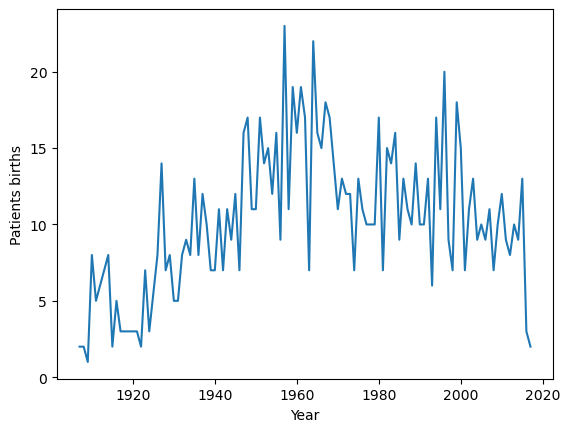

In [53]:
agg_year = patient_df.groupby(["birth_year"])["resource.gender"].count().reset_index()
agg_year.columns = ["birth_year", "count"]
plt.plot(agg_year["birth_year"], agg_year["count"])
plt.title = "Patients births / year"
plt.xlabel("Year")
plt.ylabel("Patients births")
plt.show()

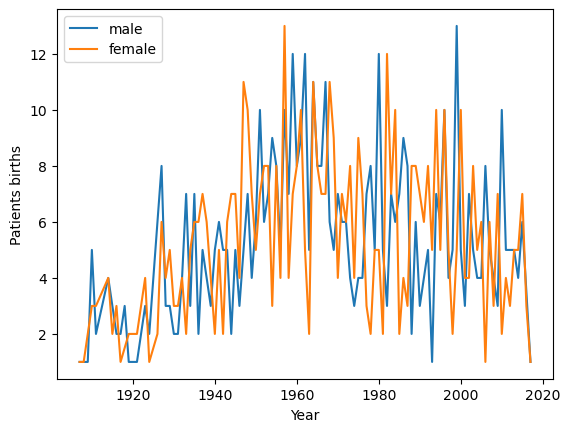

In [54]:
agg_year = patient_df.groupby(["birth_year", "resource.gender"])["resource.telecom"].count().reset_index()
agg_year.columns = ["birth_year", "gender", "count"]
plt.plot(agg_year.loc[agg_year.gender=="male", "birth_year"], agg_year.loc[agg_year.gender=="male", "count"], label="male")
plt.plot(agg_year.loc[agg_year.gender=="female", "birth_year"], agg_year.loc[agg_year.gender=="female", "count"], label="female")
plt.title = "Patients births / year"
plt.xlabel("Year")
plt.ylabel("Patients births")
plt.legend()
plt.show()

In [ ]:
#Lprocess some of the data points to extract more details about the observations.

In [62]:
observation_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.valueCodeableConcept.coding,resource.resourceType,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.component
0,urn:uuid:e375284a-0341-49bd-9e47-6dd611cf908f,e375284a-0341-49bd-9e47-6dd611cf908f,final,"[{'system': 'http://loinc.org', 'code': '69453...",urn:uuid:79768ddb-fa8a-4ce8-b9dd-139d10a3b9a1,urn:uuid:a12b8ff2-ee2a-457e-ba45-06a2210cba21,1989-04-02T17:36:25-04:00,"[{'system': 'http://snomed.info/sct', 'code': ...",Observation,NaN,NaN,NaN,NaN,NaN
0,urn:uuid:c5a7d3a6-2df5-48dc-934d-927b4eda7471,c5a7d3a6-2df5-48dc-934d-927b4eda7471,final,"[{'system': 'http://loinc.org', 'code': '4548-...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,5.900000,%,http://unitsofmeasure.org/,%,NaN
0,urn:uuid:2602b0e0-d24f-48e6-be10-194a5b74954f,2602b0e0-d24f-48e6-be10-194a5b74954f,final,"[{'system': 'http://loinc.org', 'code': '8302-...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,159.364720,cm,http://unitsofmeasure.org/,cm,NaN
0,urn:uuid:d02d6028-669d-4287-8dc7-a745986dabe2,d02d6028-669d-4287-8dc7-a745986dabe2,final,"[{'system': 'http://loinc.org', 'code': '29463...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,81.561921,kg,http://unitsofmeasure.org/,kg,NaN
0,urn:uuid:e3f066b8-c31f-45cc-89c3-37a4a380a63e,e3f066b8-c31f-45cc-89c3-37a4a380a63e,final,"[{'system': 'http://loinc.org', 'code': '39156...",urn:uuid:1117ae06-e920-4768-a351-f0db77a1edaa,urn:uuid:ae971218-cb54-40a9-8a49-08b169ecbb4f,2010-07-25T22:30:48-04:00,NaN,Observation,32.114642,kg/m2,http://unitsofmeasure.org/,kg/m2,NaN


In [63]:
observation_df.iloc[0]["resource.code.coding"]

[{'system': 'http://loinc.org',
  'code': '69453-9',
  'display': 'Cause of Death [US Standard Certificate of Death]'}]

In [64]:
def extract_subitems_by_name(item_list, name):
    for item in item_list:
        if item[name]:
            return item[name]
            
def extract_one_subitem_by_name(item_list, name):
    return item_list[0][name]

In [65]:
observation_df["date"] = observation_df["resource.effectiveDateTime"].apply(lambda x: dt.strptime(x[0:10], '%Y-%m-%d'))

In [66]:
observation_df["resource.code.code"] = observation_df["resource.code.coding"].apply(lambda x: extract_one_subitem_by_name(x, 'code'))
observation_df["resource.code.display"] = observation_df["resource.code.coding"].apply(lambda x: extract_one_subitem_by_name(x, 'display'))

In [71]:

#data distribution for the observations, grouped by code.display.

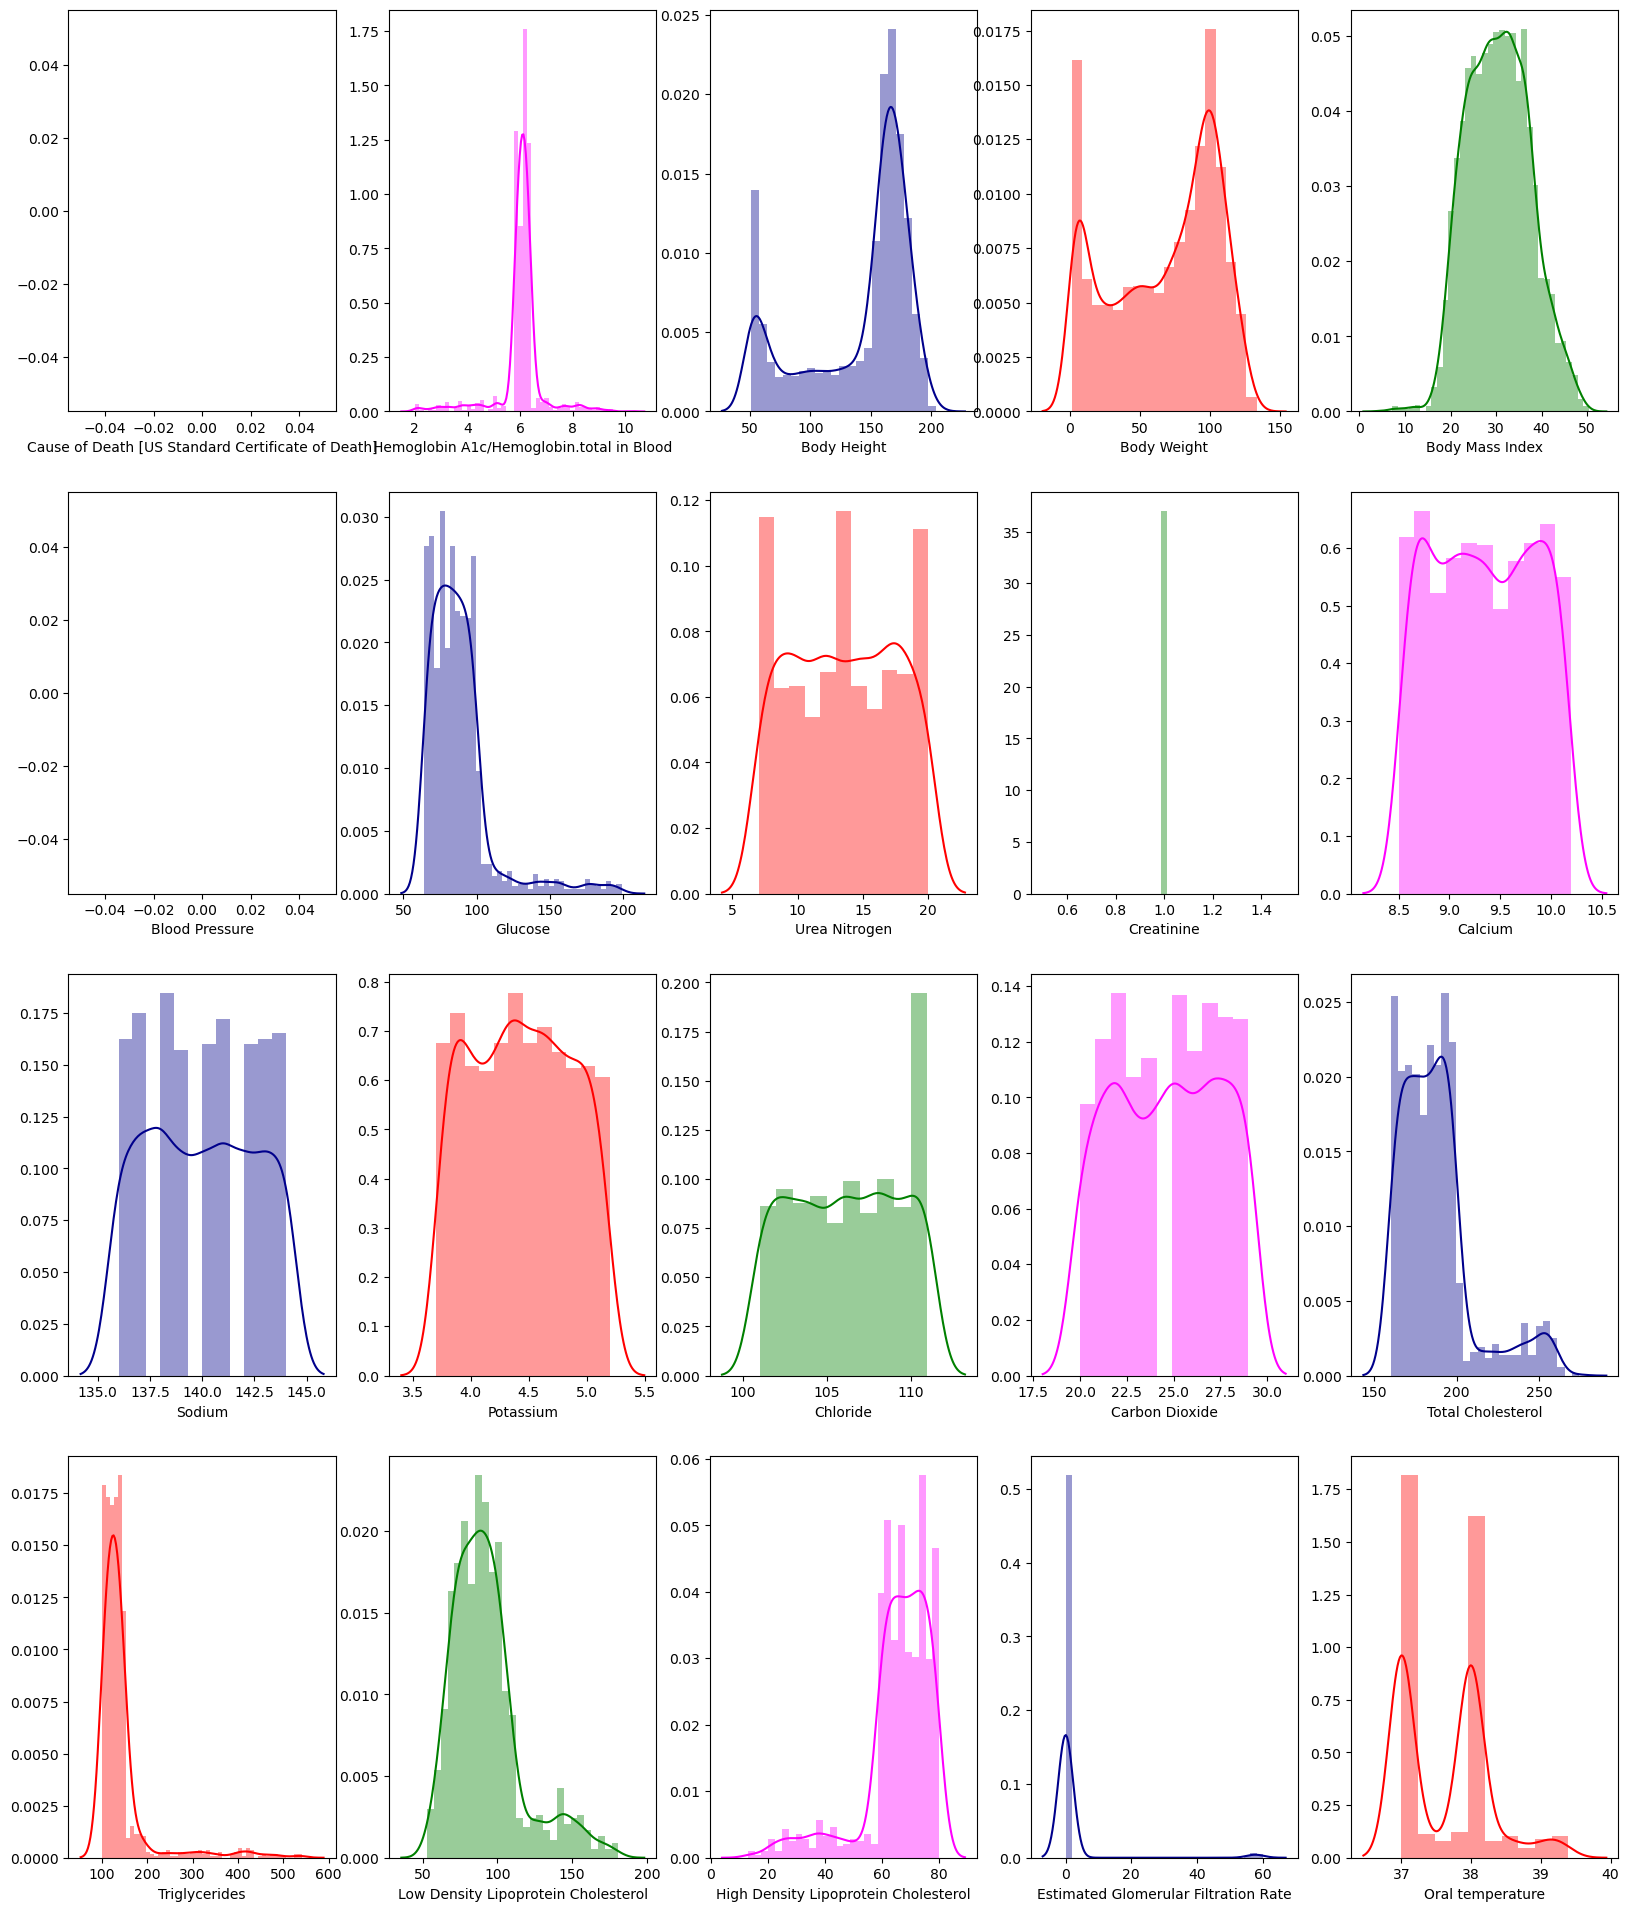

In [72]:
resource_code_display = observation_df["resource.code.display"].unique()
f, ax = plt.subplots(4, 5, figsize=(20, 24))
i = 0
colors = ["darkblue"]
for display in resource_code_display[0:20]:
    i += 1
    plt.subplot(4, 5,i)
    sel_df = observation_df.loc[observation_df["resource.code.display"]==display]
    g = sns.distplot(sel_df["resource.valueQuantity.value"], color=colors[i%4])
    g.set(ylabel=None)
    g.set(xlabel=display)
plt.show()

In [73]:
#observation data for one patient

In [74]:
sel_patient = observation_df["resource.subject.reference"].value_counts().index[0]
print(sel_patient)
obs_subset_df = observation_df.loc[observation_df["resource.subject.reference"]==sel_patient]

urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357


In [75]:
obs_subset_df.head()

,fullUrl,resource.id,resource.status,resource.code.coding,resource.subject.reference,resource.encounter.reference,resource.effectiveDateTime,resource.valueCodeableConcept.coding,resource.resourceType,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.component,date,resource.code.code,resource.code.display
0,urn:uuid:59907111-4d6a-40e1-a38c-1900ef4e377d,59907111-4d6a-40e1-a38c-1900ef4e377d,final,"[{'system': 'http://loinc.org', 'code': '4548-...",urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357,urn:uuid:286ae6b7-75e3-4dde-9632-82230ea402eb,2010-07-16T00:17:43-04:00,NaN,Observation,6.300000,%,http://unitsofmeasure.org/,%,NaN,2010-07-16,4548-4,Hemoglobin A1c/Hemoglobin.total in Blood
0,urn:uuid:aa043e5b-ba00-489e-b6a6-e56ad88255b3,aa043e5b-ba00-489e-b6a6-e56ad88255b3,final,"[{'system': 'http://loinc.org', 'code': '8302-...",urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357,urn:uuid:286ae6b7-75e3-4dde-9632-82230ea402eb,2010-07-16T00:17:43-04:00,NaN,Observation,178.097427,cm,http://unitsofmeasure.org/,cm,NaN,2010-07-16,8302-2,Body Height
0,urn:uuid:7d63ec02-e455-4c1b-bd4a-cde1a42cbb13,7d63ec02-e455-4c1b-bd4a-cde1a42cbb13,final,"[{'system': 'http://loinc.org', 'code': '29463...",urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357,urn:uuid:286ae6b7-75e3-4dde-9632-82230ea402eb,2010-07-16T00:17:43-04:00,NaN,Observation,99.508004,kg,http://unitsofmeasure.org/,kg,NaN,2010-07-16,29463-7,Body Weight
0,urn:uuid:199fb7b6-ed17-45a2-bb76-cc9b59ab615e,199fb7b6-ed17-45a2-bb76-cc9b59ab615e,final,"[{'system': 'http://loinc.org', 'code': '39156...",urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357,urn:uuid:286ae6b7-75e3-4dde-9632-82230ea402eb,2010-07-16T00:17:43-04:00,NaN,Observation,31.372037,kg/m2,http://unitsofmeasure.org/,kg/m2,NaN,2010-07-16,39156-5,Body Mass Index
0,urn:uuid:fd61fac1-f19a-4a0b-a775-ae2c271f6af9,fd61fac1-f19a-4a0b-a775-ae2c271f6af9,final,"[{'system': 'http://loinc.org', 'code': '55284...",urn:uuid:16f586c1-8124-4382-b36a-d99f8f0ee357,urn:uuid:286ae6b7-75e3-4dde-9632-82230ea402eb,2010-07-16T00:17:43-04:00,NaN,Observation,NaN,NaN,NaN,NaN,[{'code': {'coding': [{'system': 'http://loinc...,2010-07-16,55284-4,Blood Pressure


In [78]:
#distribution of few of the data for this patient.

In [79]:
sel_obs_columns = ["resource.code.display", "resource.effectiveDateTime", "resource.valueQuantity.value",
               "resource.valueQuantity.unit","resource.valueQuantity.system","resource.valueQuantity.code", "date"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

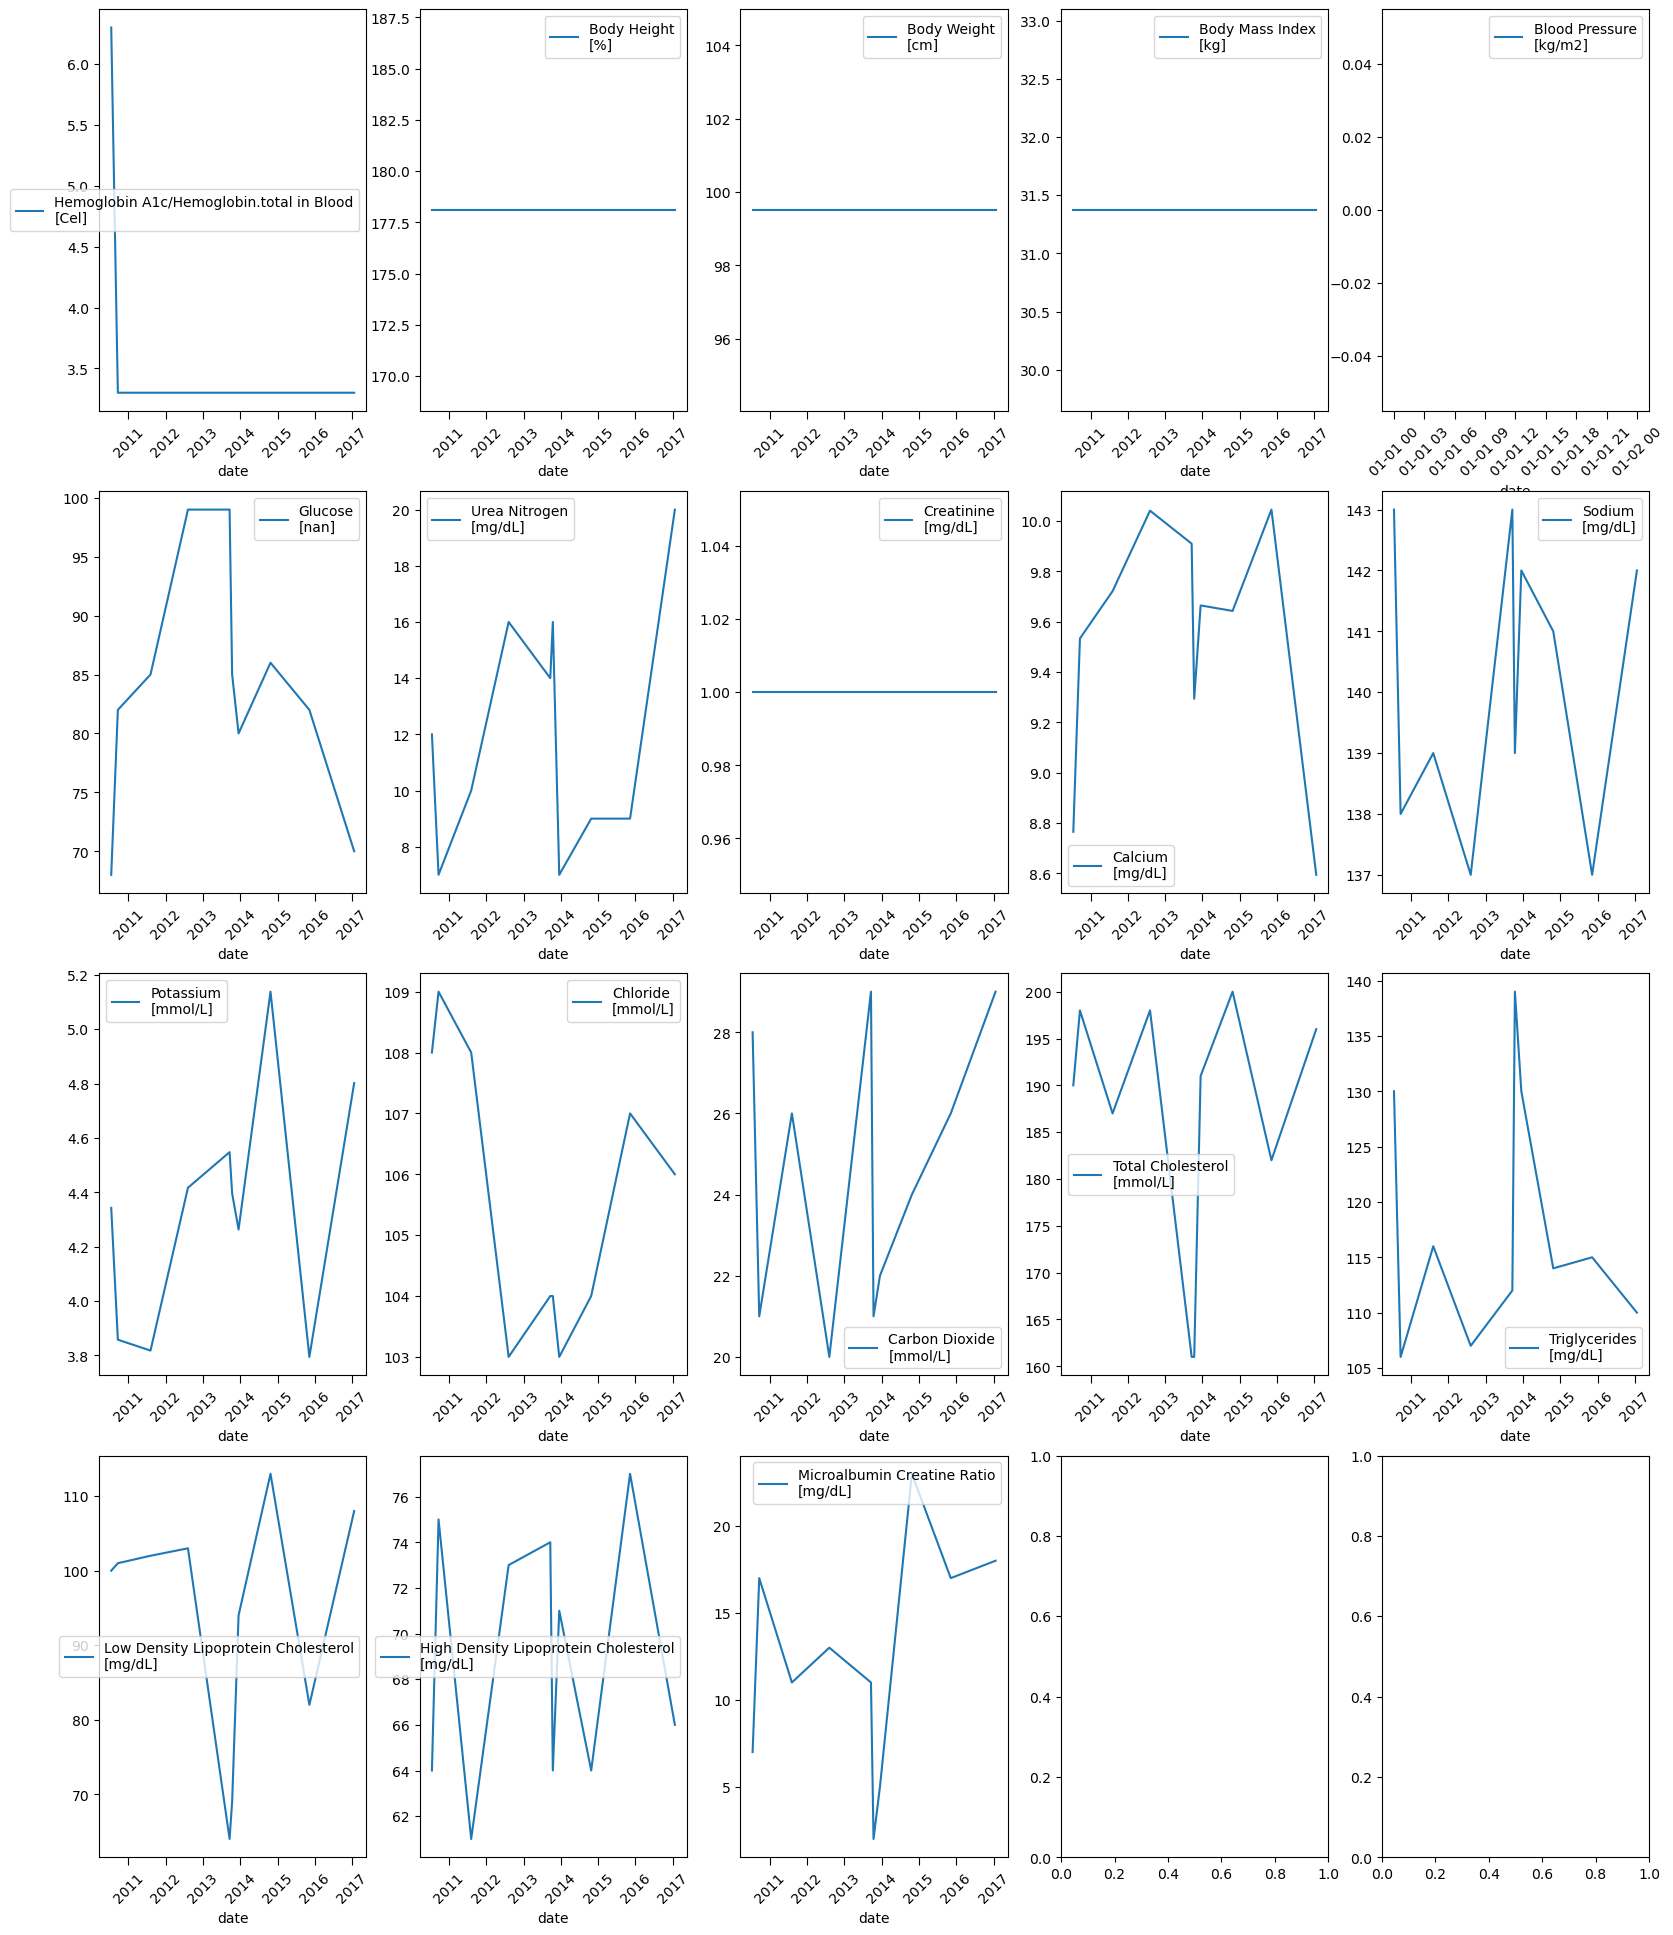

In [80]:
resource_code_display = obs_subset_df["resource.code.display"].unique()



f, ax = plt.subplots(4, 5, figsize=(20, 24))
i = 0
for display in resource_code_display[:-2]:
    i += 1
    plt.subplot(4, 5,i)
    plt.legend(loc=2, prop={'size': 3})
    label_text = f"{display}\n[{sel_df['resource.valueQuantity.code'].values[0]}]"
    sel_df = obs_subset_df.loc[obs_subset_df["resource.code.display"]==display]
    plt.plot(sel_df["date"], sel_df["resource.valueQuantity.value"], label=label_text)
    plt.tick_params(axis='x', rotation=45, size=6)
    plt.xlabel("date")
    plt.legend()
plt.show()

In [81]:
#More patients

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: urn:uuid:8a7d1161-f041-4a5a-bb6b-103557f766d0


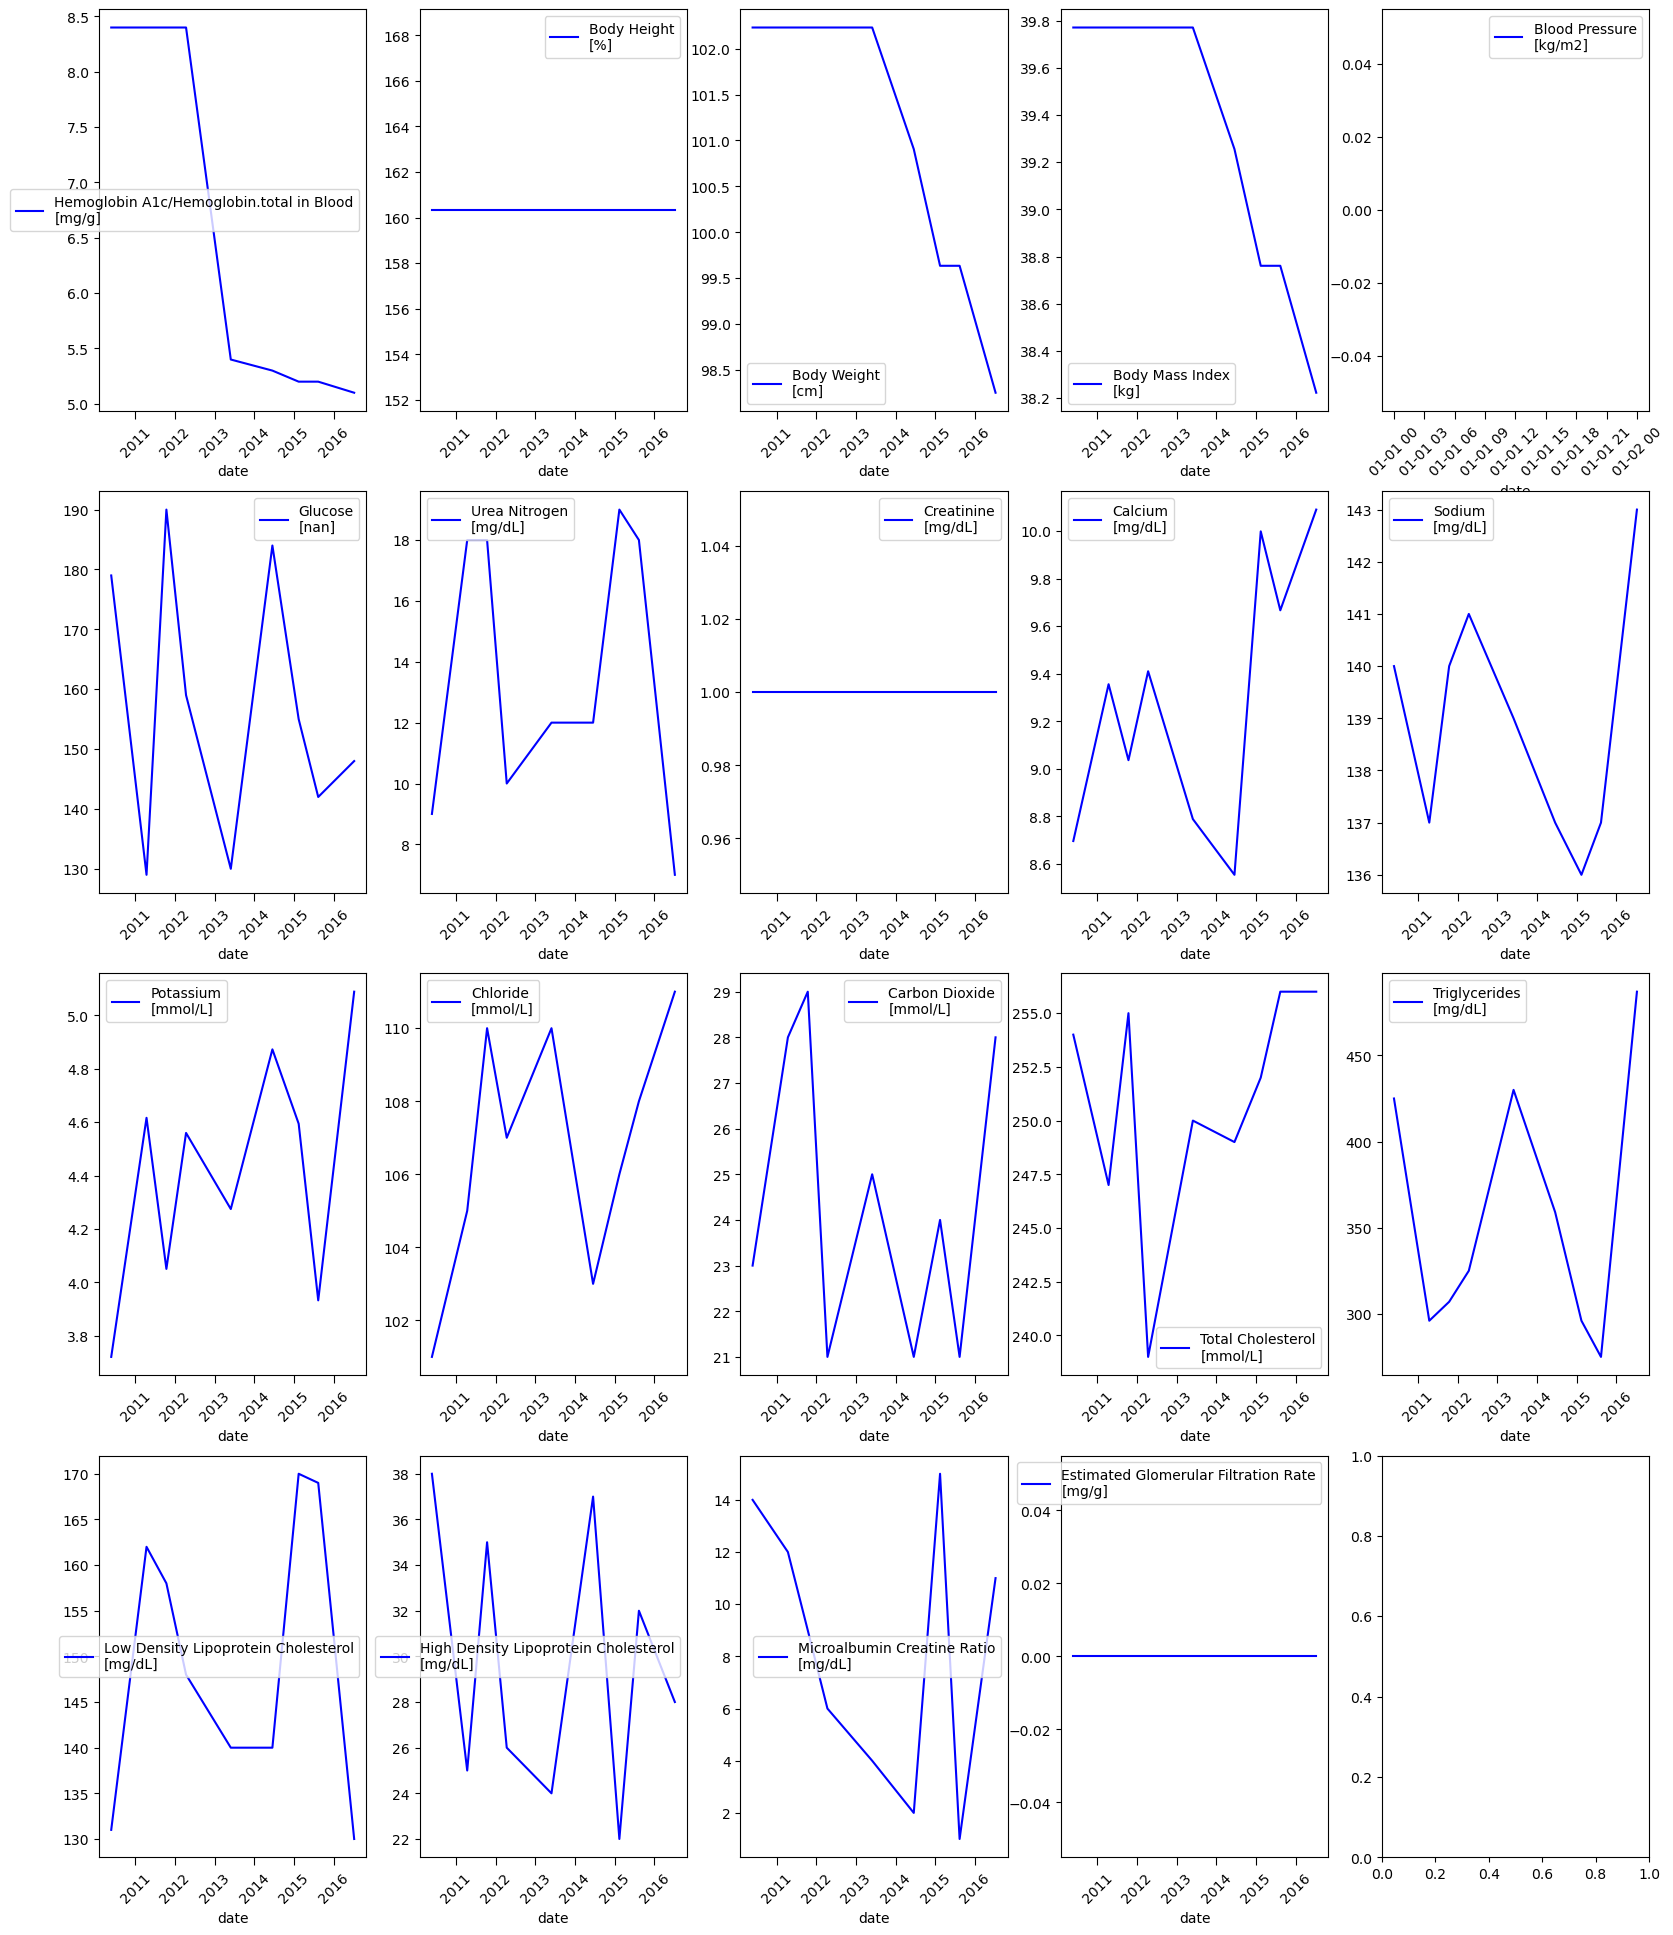

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: urn:uuid:6bda6597-e27a-4dbc-afa9-2e04cccb8bde


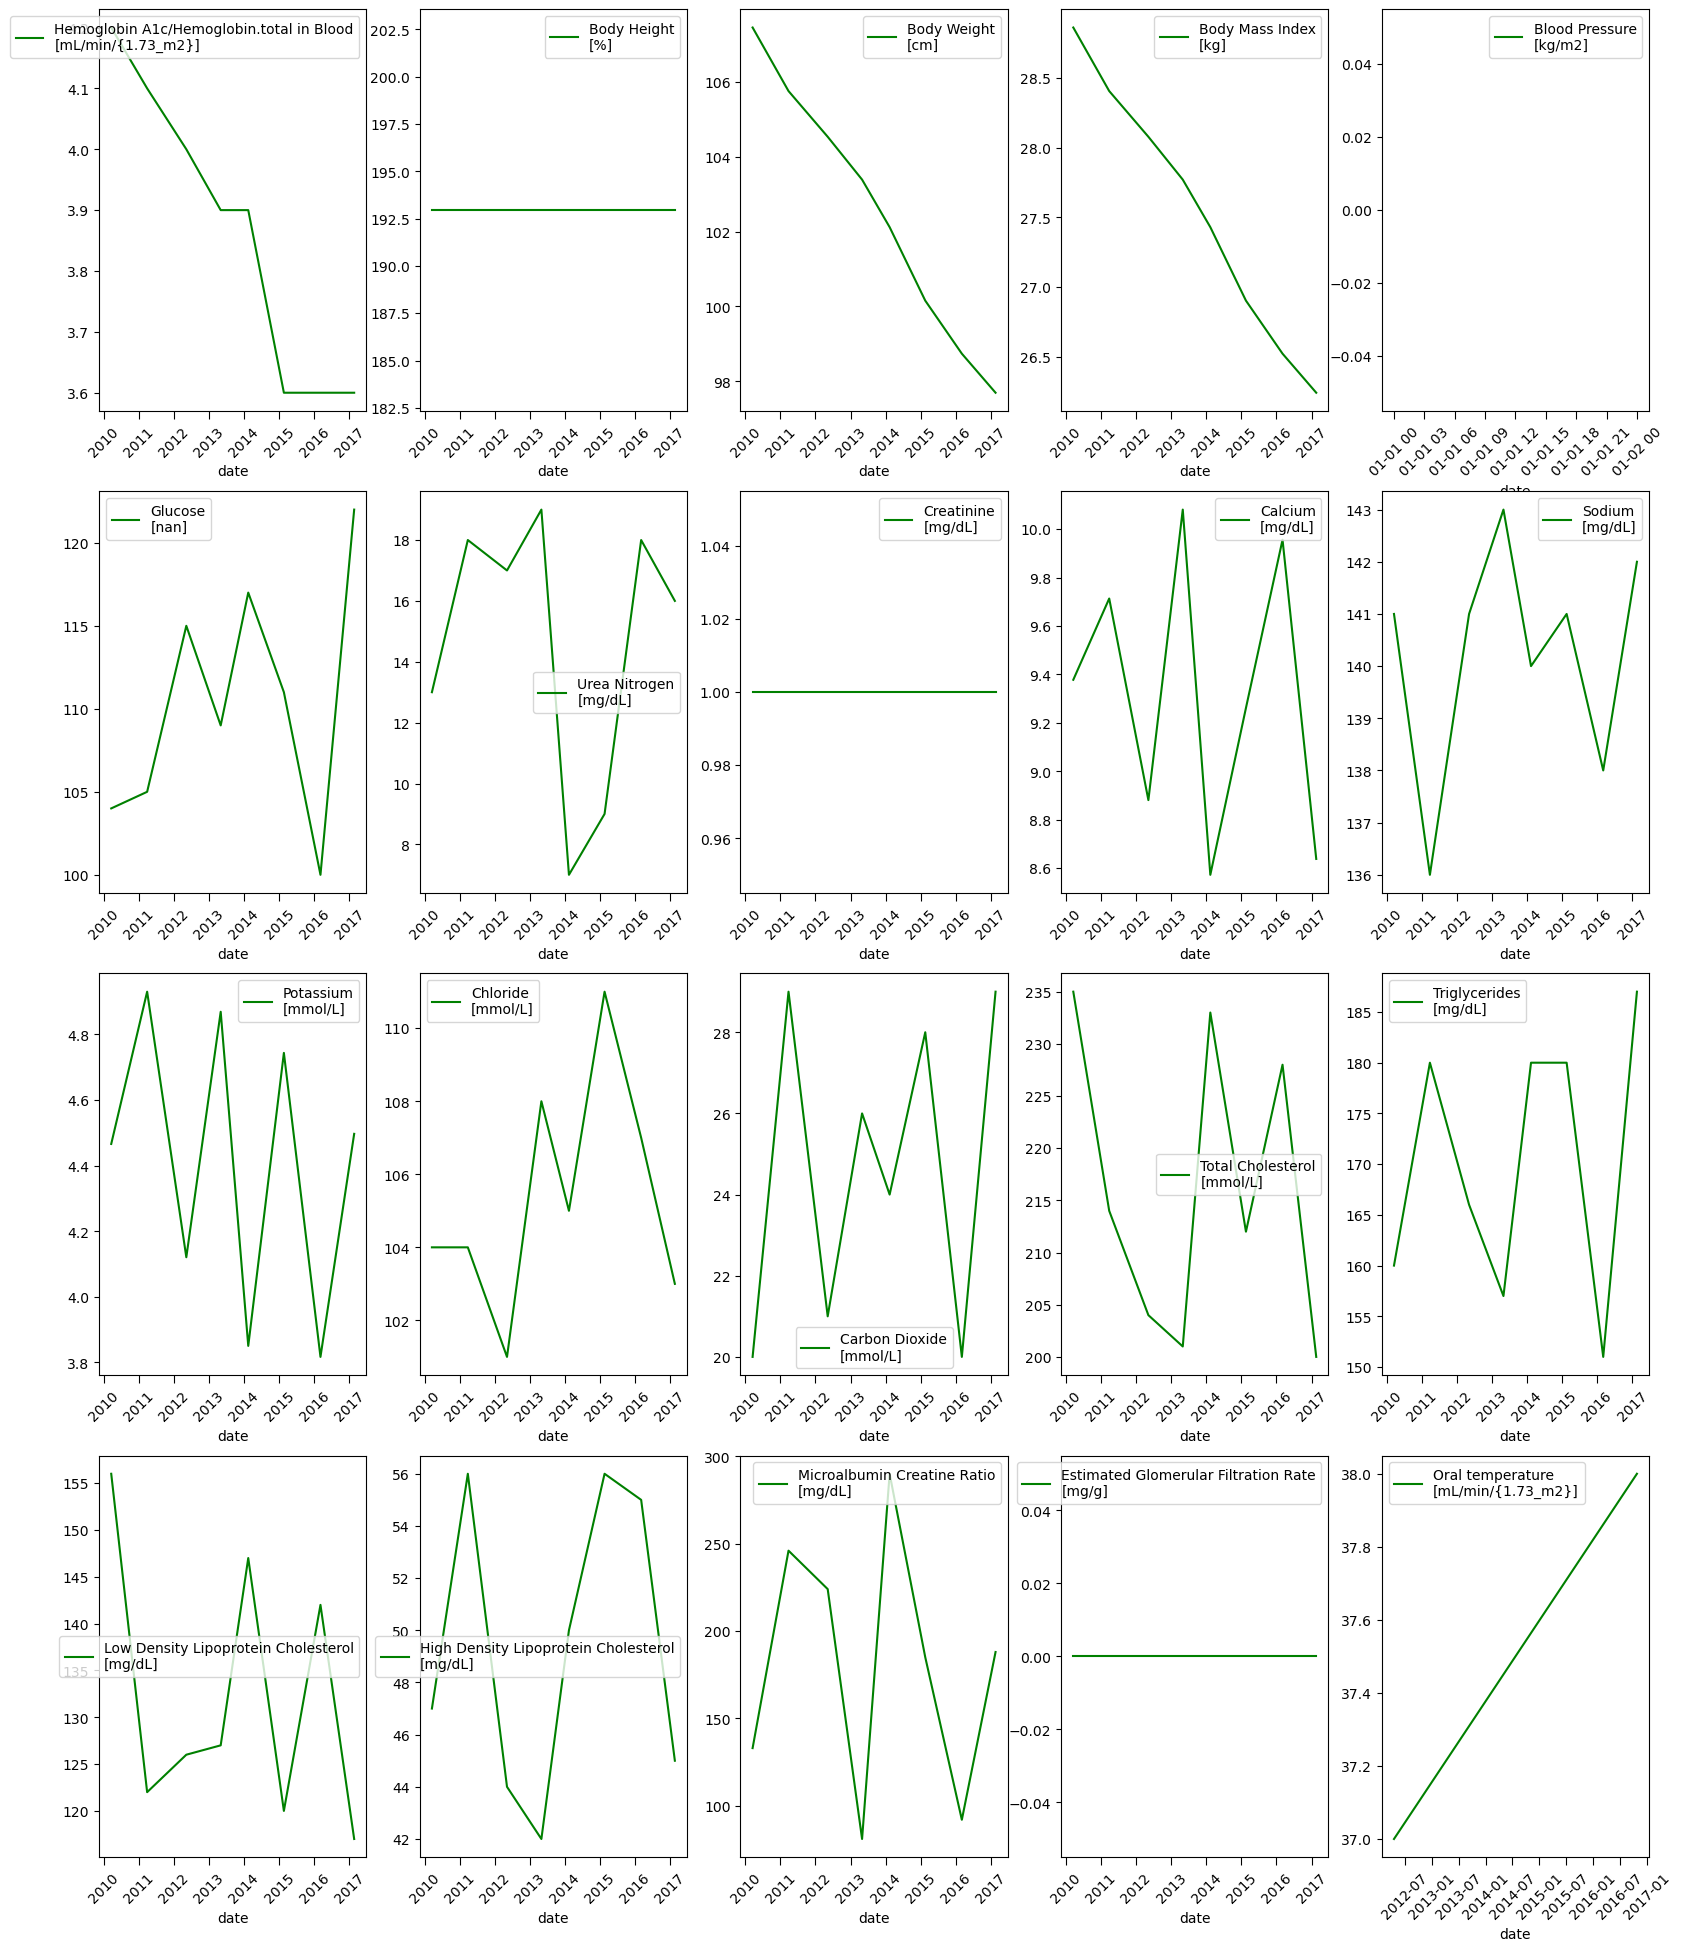

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: urn:uuid:f18d842b-f133-48b5-89c7-dcfd33333342


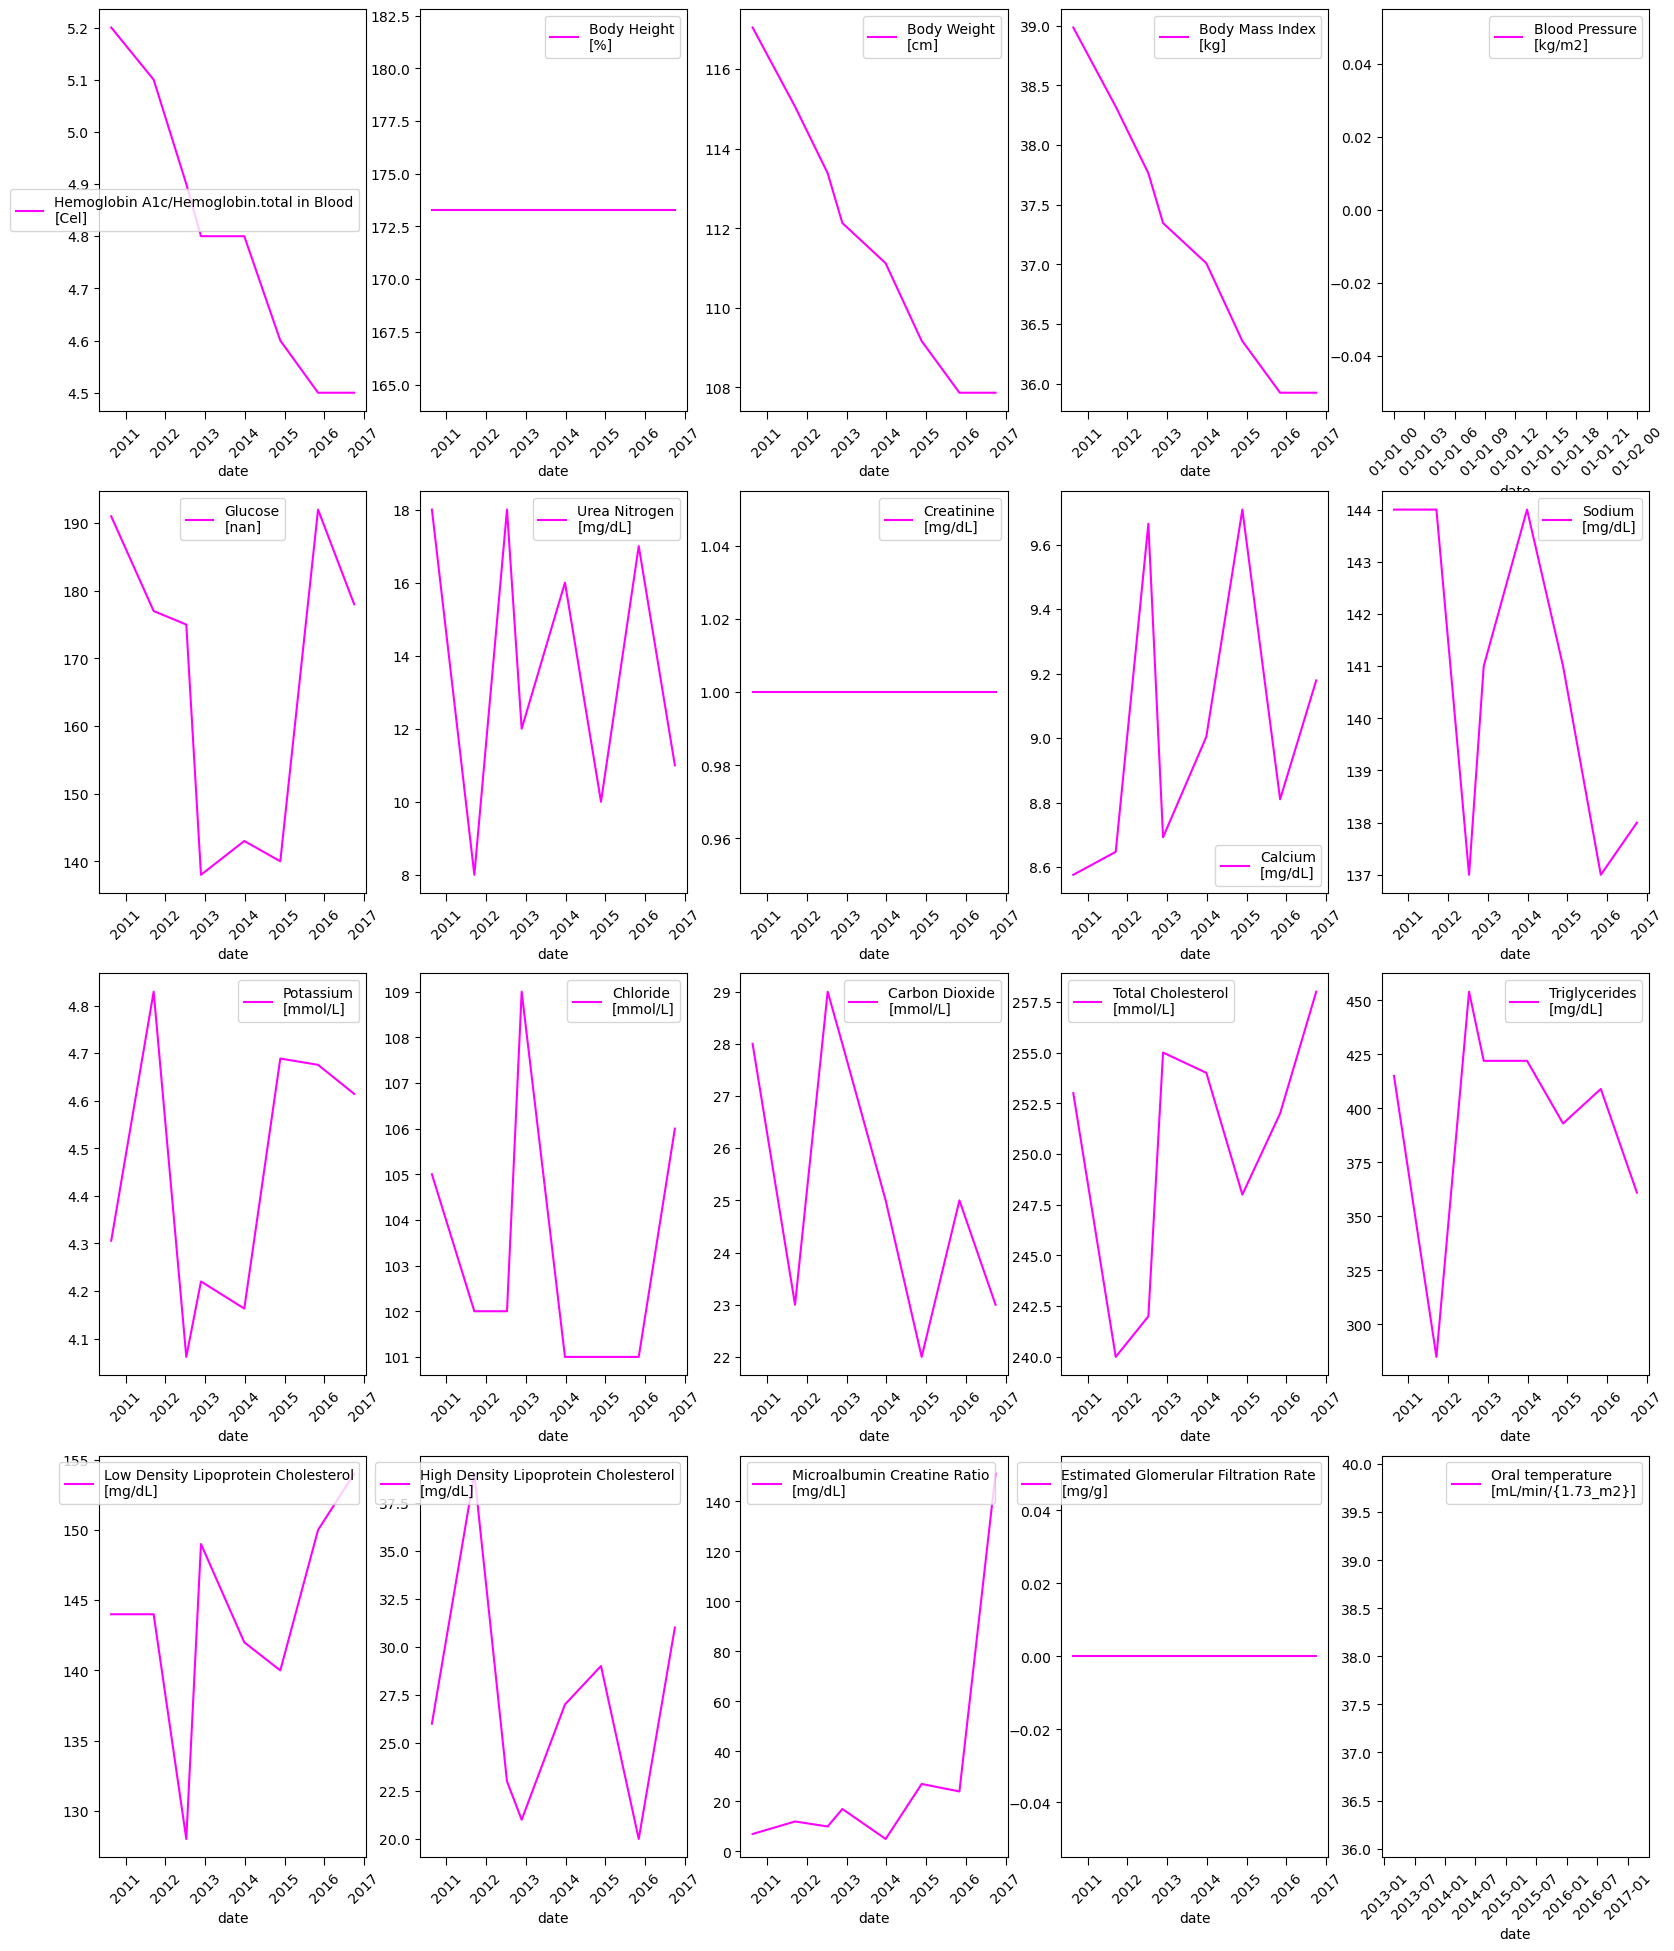

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: urn:uuid:87c5ab0b-e4a7-424b-8101-80150d30a4fe


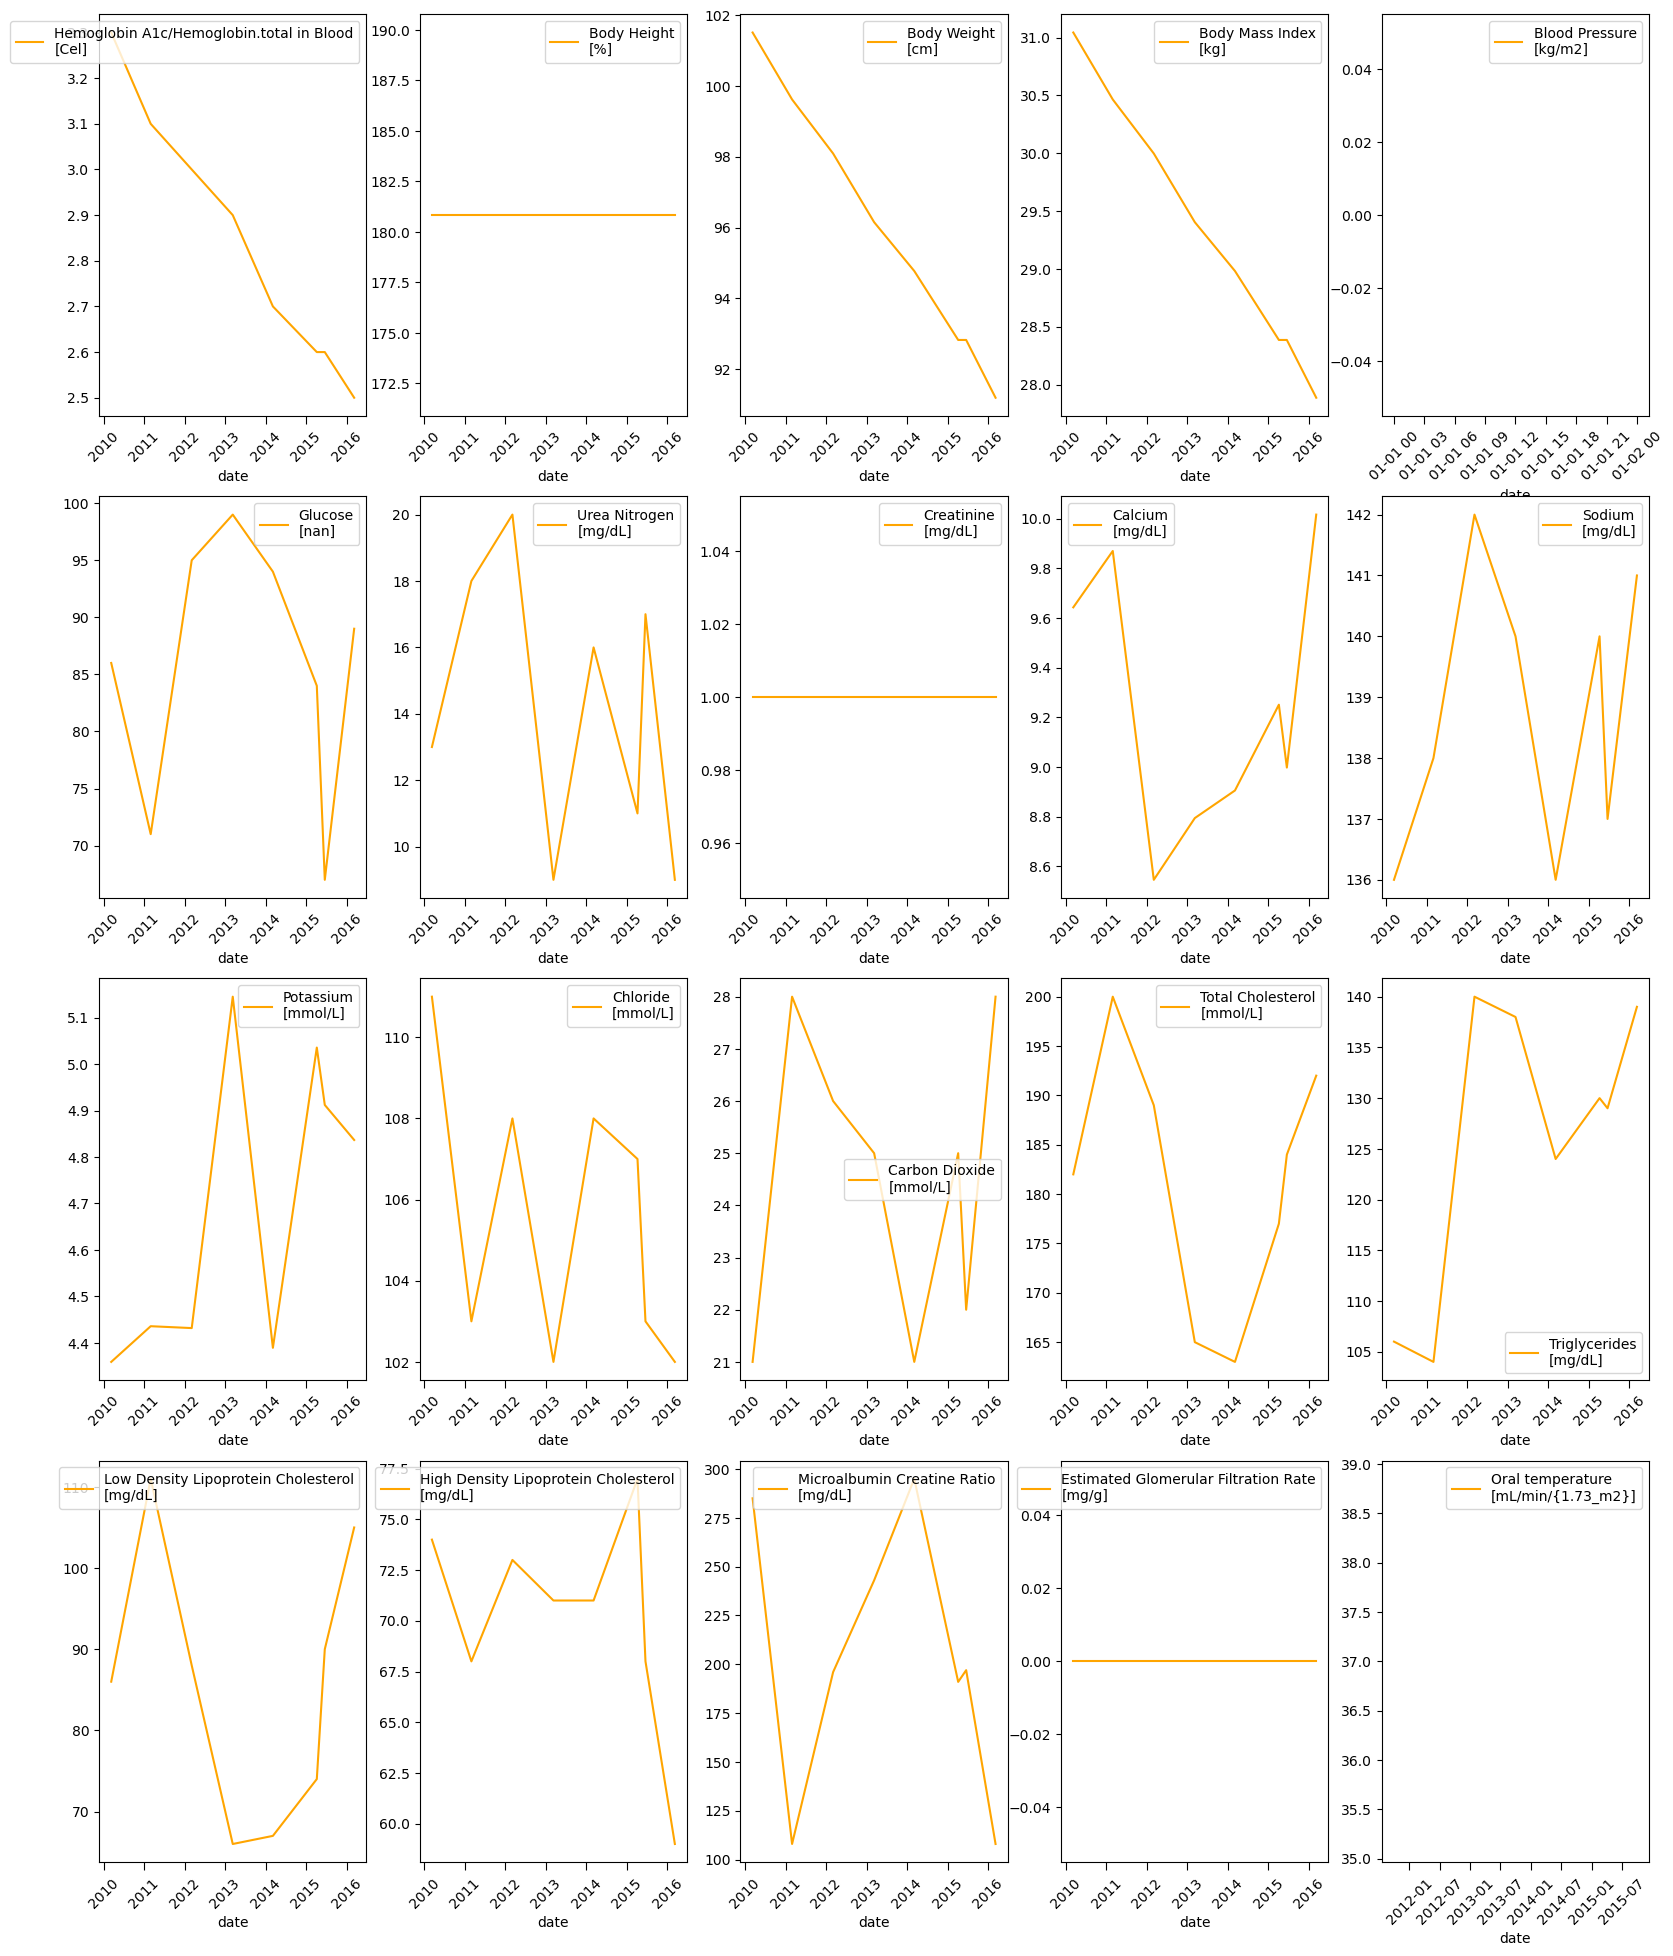

In [82]:
for idx in range(1, 5):
    sel_patient = observation_df["resource.subject.reference"].value_counts().index[idx]
    print(f"Selected patient: {sel_patient}")
    obs_subset_df = observation_df.loc[observation_df["resource.subject.reference"]==sel_patient]
    resource_code_display = obs_subset_df["resource.code.display"].unique()
    colors = ["red", "blue", "green", "magenta", "orange"]
    f, ax = plt.subplots(4, 5, figsize=(20, 24))
    i = 0
    for display in resource_code_display[0:20]:
        i += 1
        plt.subplot(4, 5,i)
        plt.legend(loc=2, prop={'size': 3})
        label_text = f"{display}\n[{sel_df['resource.valueQuantity.code'].values[0]}]"
        sel_df = obs_subset_df.loc[obs_subset_df["resource.code.display"]==display]
        plt.plot(sel_df["date"], sel_df["resource.valueQuantity.value"], label=label_text, color=colors[idx])
        plt.tick_params(axis='x', rotation=45, size=6)
        plt.xlabel("date")
        plt.legend()
    plt.show()